In [1]:
from dataclasses import dataclass
from enum import StrEnum
from datetime import datetime, timedelta
import polars as pl
from collections import defaultdict, Counter
from typing import Tuple
from common.constants.column_types import (
    CPZP_SCHEMA,
    OZP_SCHEMA,
    POHLAVI_CPZP,
    TYP_UDALOSTI,
)
from common.constants.column_names import SHARED_COLUMNS, OZP_COLUMNS, CPZP_COLUMNS
import pickle
from common.constants.objects import (
    Person,
    Gender,
    AgeCohort,
    Prescription,
    PrescriptionType,
)
from common.utils import draw_chart, draw_bar_chart
import matplotlib.pyplot as plt
import numpy as np
import os

pl.Config.set_tbl_rows(20)
pl.Config.set_tbl_cols(60)

polars.config.Config

In [2]:
POJISTOVNA = "ozp"
with open(f"./DATACON_data/{POJISTOVNA}_persons.pkl", "rb") as f:
    persons: list[Person] = pickle.load(f)

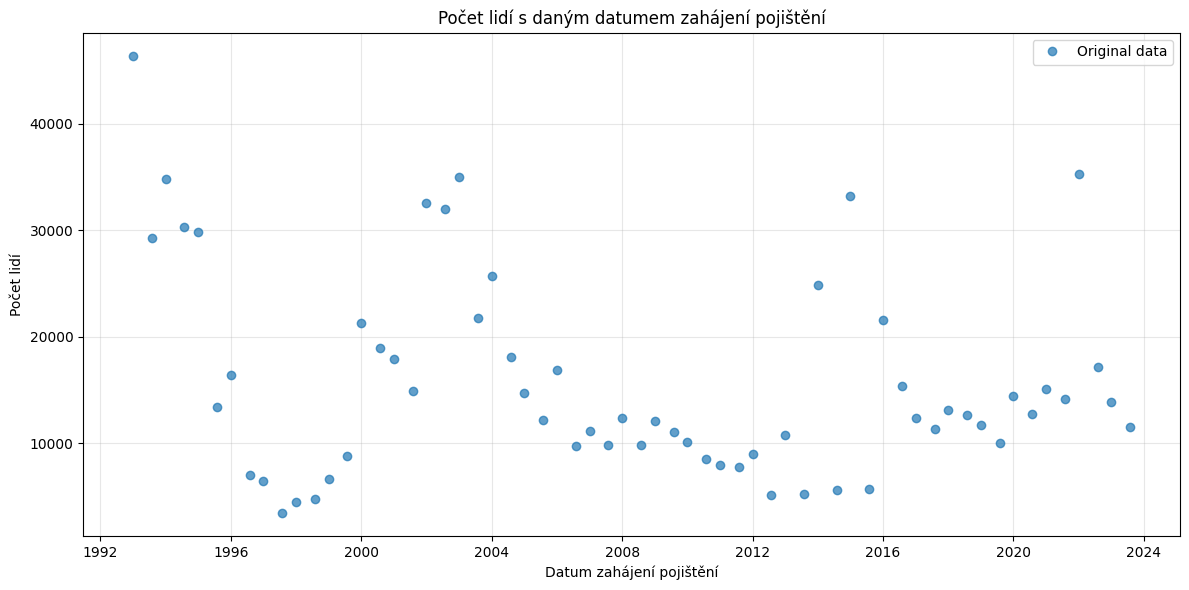

In [3]:
datum_zahajeni_pojisteni_map = {}
for person in persons:
    if person.zahajeni_pojisteni < datetime(1980, 1, 1).date():
        continue
    if person.zahajeni_pojisteni not in datum_zahajeni_pojisteni_map:
        datum_zahajeni_pojisteni_map[person.zahajeni_pojisteni] = 1
    else:
        datum_zahajeni_pojisteni_map[person.zahajeni_pojisteni] += 1

draw_chart(
    mapp=datum_zahajeni_pojisteni_map,
    x_label="Datum zahájení pojištění",
    y_label="Počet lidí",
    title="Počet lidí s daným datumem zahájení pojištění",
    average=False,
)

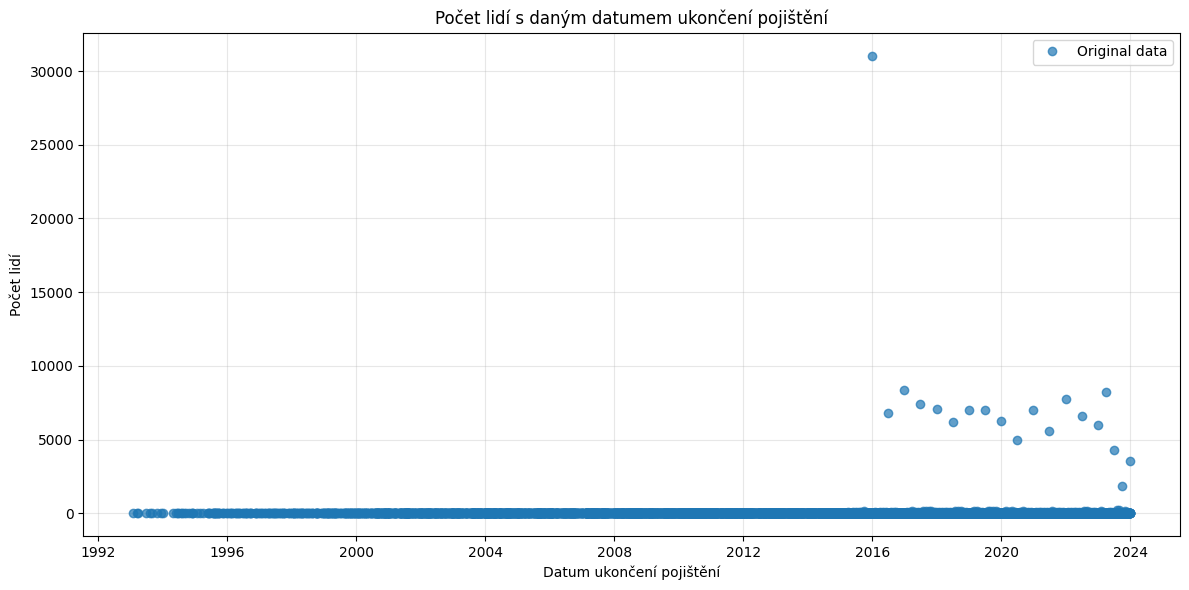

In [4]:
datum_ukonceni_pojisteni_map = {}
for person in persons:
    if not person.ukonceni_pojisteni:
        continue
    if (
        person.ukonceni_pojisteni < datetime(1980, 1, 1).date()
        or person.ukonceni_pojisteni > datetime(2026, 1, 1).date()
    ):
        continue
    if person.ukonceni_pojisteni not in datum_ukonceni_pojisteni_map:
        datum_ukonceni_pojisteni_map[person.ukonceni_pojisteni] = 1
    else:
        datum_ukonceni_pojisteni_map[person.ukonceni_pojisteni] += 1

draw_chart(
    mapp=datum_ukonceni_pojisteni_map,
    x_label="Datum ukončení pojištění",
    y_label="Počet lidí",
    title="Počet lidí s daným datumem ukončení pojištění",
    average=False,
)

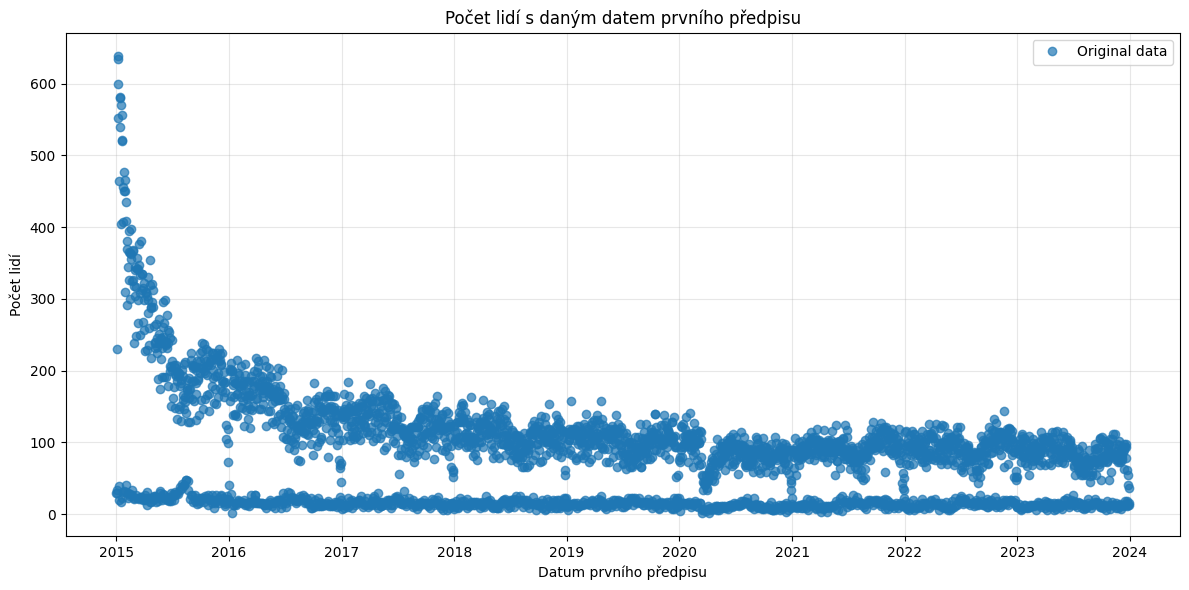

In [5]:
datum_predpisu = {}
for person in persons:
    if not person.prescriptions:
        continue
    prvopredpis_date = person.prescriptions[0].date
    if prvopredpis_date not in datum_predpisu:
        datum_predpisu[prvopredpis_date] = 1
    else:
        datum_predpisu[prvopredpis_date] += 1

draw_chart(
    mapp=datum_predpisu,
    x_label="Datum prvního předpisu",
    y_label="Počet lidí",
    title="Počet lidí s daným datem prvního předpisu",
    average=False,
)

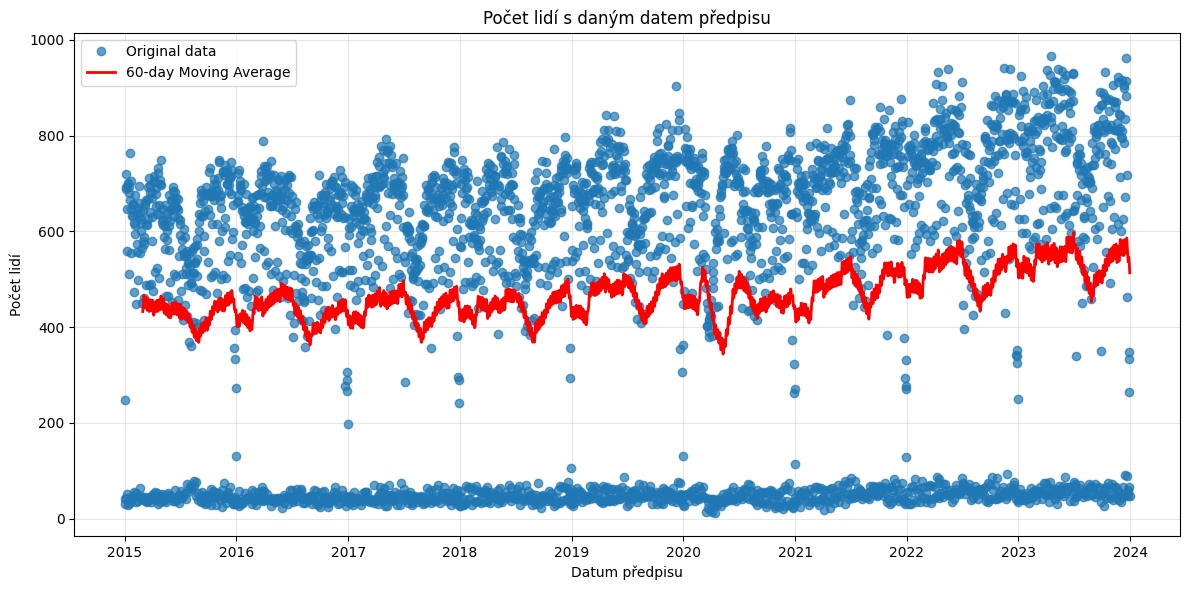

In [6]:
datum_predpisu = {}
for person in persons:
    if not person.prescriptions:
        continue
    for prescription in person.prescriptions:
        if prescription.date not in datum_predpisu:
            datum_predpisu[prescription.date] = 1
        else:
            datum_predpisu[prescription.date] += 1

draw_chart(
    mapp=datum_predpisu,
    x_label="Datum předpisu",
    y_label="Počet lidí",
    title="Počet lidí s daným datem předpisu",
    average=60,
)

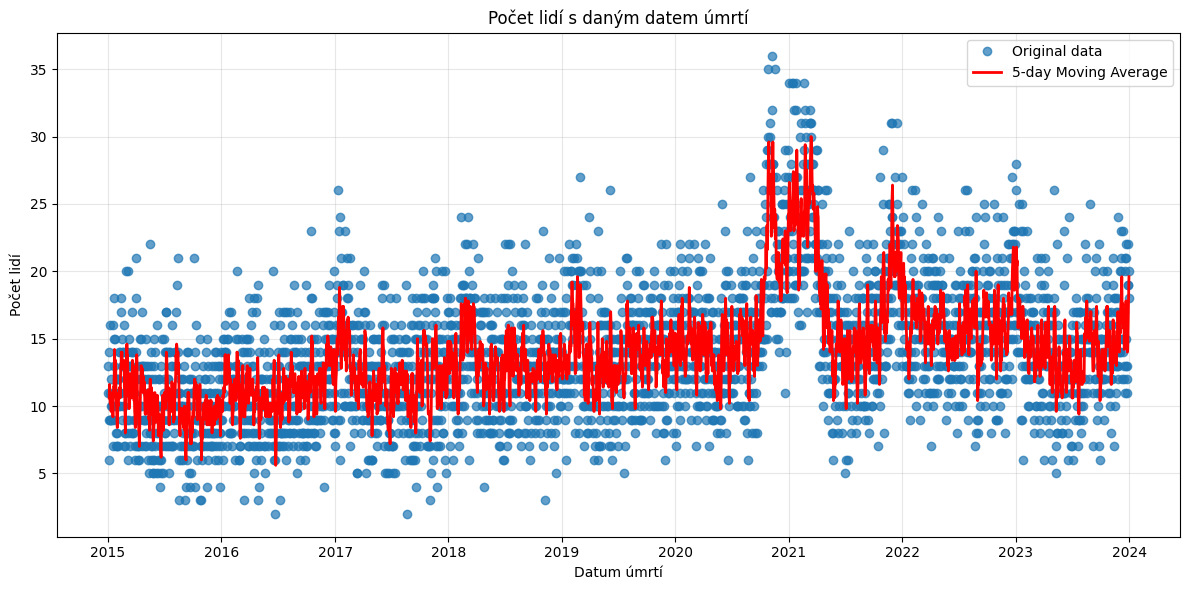

In [7]:
datum_umrti = {}
for person in persons:
    if not person.died_at:
        continue
    if person.died_at not in datum_umrti:
        datum_umrti[person.died_at] = 1
    else:
        datum_umrti[person.died_at] += 1

draw_chart(
    mapp=datum_umrti,
    x_label="Datum úmrtí",
    y_label="Počet lidí",
    title="Počet lidí s daným datem úmrtí",
    average=5,
)

{<AgeCohort.LESS_THAN_12: 'less_than_12'>: 99040, <AgeCohort.BETWEEN_12_AND_30: 'between_12_and_30'>: 221290, <AgeCohort.BETWEEN_30_AND_50: 'between_30_and_50'>: 263150, <AgeCohort.BETWEEN_50_AND_70: 'between_50_and_70'>: 244508, <AgeCohort.MORE_THAN_70: 'more_than_70'>: 149497}


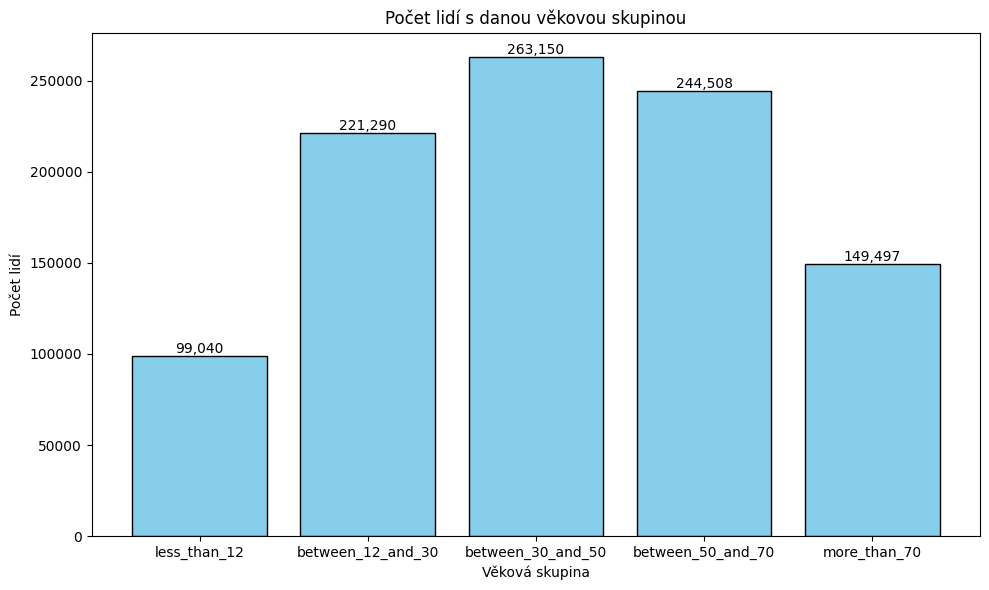

In [ ]:
age_cohort_map = {
    AgeCohort.LESS_THAN_12: 0,
    AgeCohort.BETWEEN_12_AND_30: 0,
    AgeCohort.BETWEEN_30_AND_50: 0,
    AgeCohort.BETWEEN_50_AND_70: 0,
    AgeCohort.MORE_THAN_70: 0,
}
for person in persons:
    age_cohort_map[person.age_cohort] += 1

draw_bar_chart(
    mapp=age_cohort_map,
    x_label="Věková skupina",
    y_label="Počet lidí",
    title="Počet lidí s danou věkovou skupinou",
)

{0: 474577, 1: 33401, 2: 187617, 3: 219253, 4: 42262, 5: 20128, 6: 235, 7: 11, 8: 1, 9: 0, 10: 0}


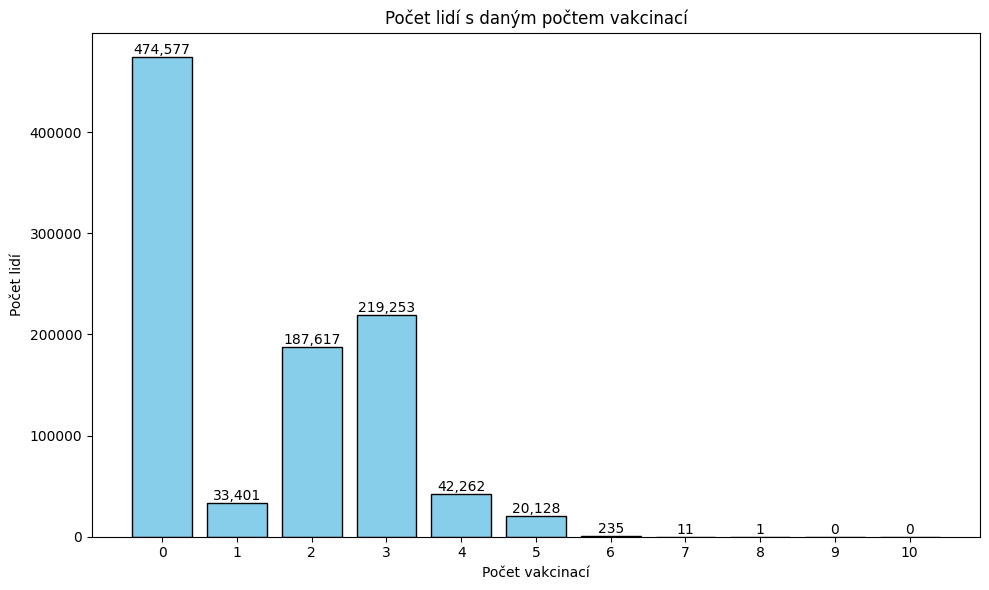

In [ ]:
pocet_vakcin_map = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
    10: 0,
}
for person in persons:
    pocet_vakcin_map[len(person.vaccines)] += 1

draw_bar_chart(
    mapp=pocet_vakcin_map,
    x_label="Počet vakcinací",
    y_label="Počet lidí",
    title="Počet lidí s daným počtem vakcinací",
)

Person(id='ANPOJ00885267', gender=<Gender.MALE: 'male'>, born_at=datetime.datetime(1953, 1, 1, 0, 0), zahajeni_pojisteni=datetime.date(1994, 1, 1), ukonceni_pojisteni=None, age_cohort=<AgeCohort.MORE_THAN_70: 'more_than_70'>, vaccines=[Vaccine(date=datetime.date(2021, 4, 24), dose_number=1, age_cohort=<AgeCohort.BETWEEN_50_AND_70: 'between_50_and_70'>), Vaccine(date=datetime.date(2021, 6, 5), dose_number=2, age_cohort=<AgeCohort.BETWEEN_50_AND_70: 'between_50_and_70'>), Vaccine(date=datetime.date(2021, 12, 3), dose_number=3, age_cohort=<AgeCohort.BETWEEN_50_AND_70: 'between_50_and_70'>)], prescriptions=[Prescription(date=datetime.date(2015, 1, 2), latka='NATRIUM-HYDROKORTISON-SUKCINÁT', age_cohort_at_prescription=<AgeCohort.BETWEEN_50_AND_70: 'between_50_and_70'>, prescription_type=<PrescriptionType.KORTIKOID: 'kortikoid'>, equiv_sloucenina='HYDROKORTISON', prednison_equiv=0.25, specializace_lekare=None, atc_skupina='H02AB09', lekova_forma='Prášek pro injekční roztok'), Prescription(da

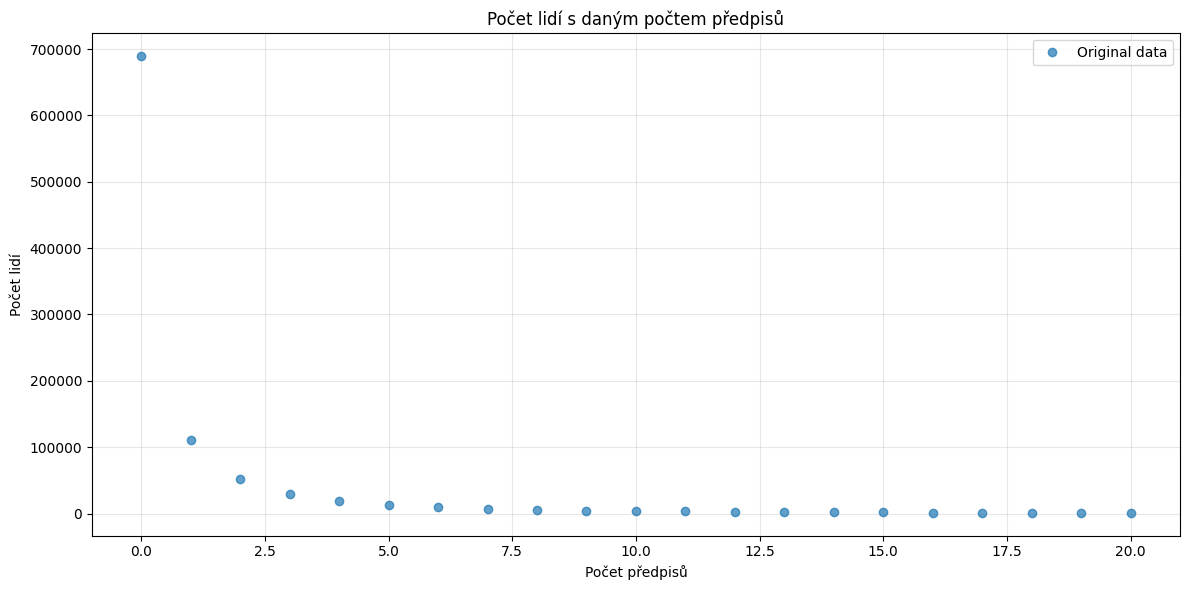

In [19]:
pocet_predpisu_map = defaultdict(int)
for person in persons:
    if len(person.prescriptions) > 800:
        print(person)
    if len(person.prescriptions) > 20:
        continue
    pocet_predpisu_map[len(person.prescriptions)] += 1

draw_chart(
    mapp=pocet_predpisu_map,
    x_label="Počet předpisů",
    y_label="Počet lidí",
    title="Počet lidí s daným počtem předpisů",
)

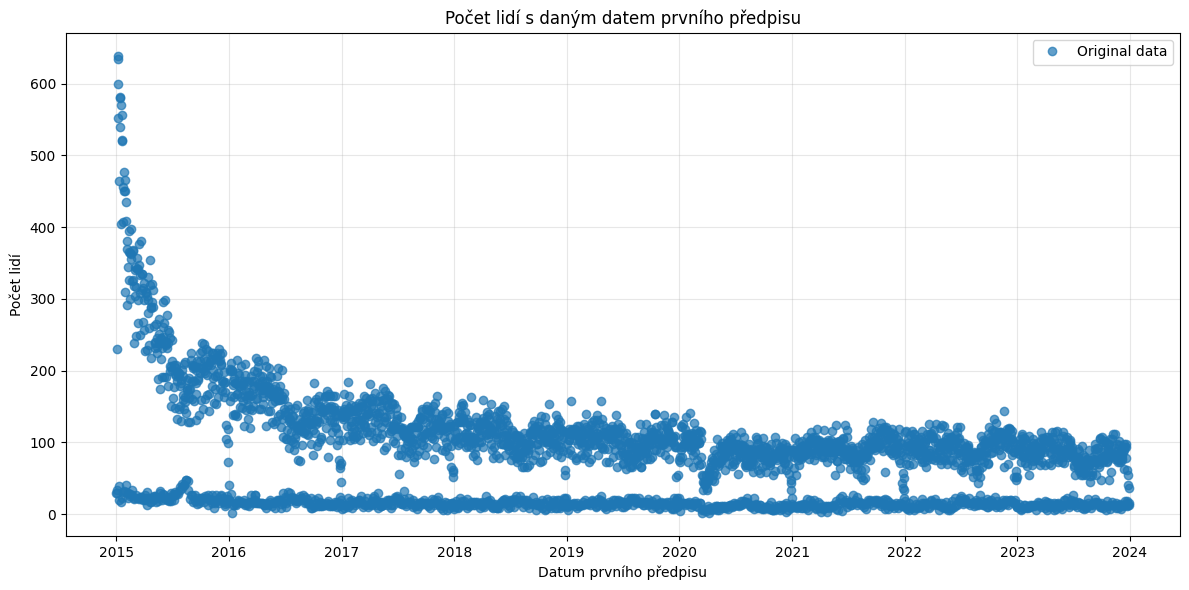

In [ ]:
pocet_prvopredpisu_map = defaultdict(int)
for person in persons:
    if person.prescriptions:
        pocet_prvopredpisu_map[person.prescriptions[0].date] += 1

draw_chart(
    mapp=pocet_prvopredpisu_map,
    x_label="Datum prvního předpisu",
    y_label="Počet lidí",
    title="Počet lidí s daným datem prvního předpisu",
)